# SYRIATEL CUSTOMER CHURN RATE ANALYSIS


## Business Understanding

 Introduction: The project aims to address a critical issue faced by SyriaTel, a telecommunications company, by developing a classifier to predict which customers are likely to stop using their services in the near future. This binary classification problem focuses on identifying patterns that signal customer churn.

Stakeholders: The primary stakeholders for this project are the management and customer retention teams at SyriaTel. These stakeholders can utilize the insights gained from the classifier to pinpoint at-risk customers more accurately. By understanding the predictive patterns of customer behavior, they can implement targeted interventions to improve retention rates and reduce revenue loss.

 Conclusion: By uncovering and analyzing predictable patterns in customer churn, this project provides valuable information that can help SyriaTel enhance their customer retention strategies. The implications for the company include reduced financial losses associated with customer attrition and improved overall profitability through more effective customer engagement and retention efforts.



## Data Understanding

 ##### Data Sources and Suitability: 
 
 The dataset for this project is sourced from Kaggle and pertains to customer churn rates within a telecommunications context. It provides detailed information about customer behaviors and attributes, which are essential for predicting churn. This dataset includes various features related to customer demographics, service usage, and account details, making it a comprehensive resource for analyzing patterns that lead to customer attrition.

##### Dataset Size and Descriptive Statistics: 
The dataset comprises 3333 records and includes several features such as:
  - account length        
  - area code   
  -  phone number           
  -  the diffferent plans      
  -  Number of messages and calls        
  - The call charges
  - Customer service calls
  - Churn


##### Feature Justification: 
Features included in the dataset are justified based on their relevance to understanding customer behavior. For instance, customer tenure is a critical indicator of potential churn, as longer tenures often correlate with higher retention rates. Service plans and billing information provide insights into customer satisfaction and usage patterns, which are pivotal for identifying churn risks. Each feature contributes valuable information for developing a predictive model.

##### Data Limitations: 
Despite its utility, the dataset has some limitations. It may not capture all factors influencing churn, such as external market conditions or changes in service quality. Additionally, if the dataset is not representative of the entire customer base, predictions may be biased. These limitations should be considered when interpreting the results and developing strategies based on the model's predictions.

## Load and understand the data

In [29]:
#import libraries
# Data manipulation
import pandas as pd
import numpy as np

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing (optional)
from sklearn.preprocessing import StandardScaler

The next step will be to explore the dataset, our DataFrame will be df

In [30]:
#load the data
df = pd.read_csv('./SyriaTel.csv')

Displaying part of the dataset

In [31]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
df.shape

(3333, 21)

The dataframe has 3333 rows and 21 columns, further checking what information is displayed in the dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [34]:
df.describe

<bound method NDFrame.describe of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes   

## Data cleaning

The customer's phone number is the unique identifier. There should be no duplicate phone numbers.

In [35]:
# check for duplicates using the phone number
df.duplicated(subset='phone number').value_counts()

False    3333
dtype: int64

The data has no duplicates 

Checking whether the data has any missing data before any exploration is done

In [36]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Data appears to have no missing values


## Exploratry Data Analysis

Converting the Categorical Variables

In [37]:
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'])
df_encoded

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,1,0,0,1
1,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,1,0,0,1
2,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,1,0,1,0
3,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,1,0
4,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,414-4276,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,1,0,0,1
3329,68,415,370-3271,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,1,0,1,0,1,0
3330,28,510,328-8230,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,1,0,1,0
3331,184,510,364-6381,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,1,1,0


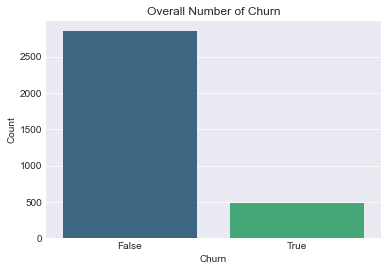

Overall Churn Rate is 14.49 %


In [38]:
# Calculate churn value counts
churn = df['churn'].value_counts()

# Plot churn distribution
sns.barplot(x=churn.index, y=churn.values, palette='viridis')
plt.title('Overall Number of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.style.use('seaborn-darkgrid')
plt.show()

# Calculate churn rate
churn_rate = (df['churn'].mean() * 100)
print('Overall Churn Rate is', round(churn_rate, 2), '%')

From the graph above, it shows we have an imbalanced issue as there are more unchurned customers than churned one.

 Feature Scaling (Optional)
For logistic regression, it’s often useful to scale numerical features to improve model performance:

In [39]:
# Initialize scaler
scaler = StandardScaler()

# Select numerical features
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

Split Data for Training and Testing

In [46]:
# Define features and target
X = df_encoded.drop(['churn', 'phone number'], axis=1)
y = df_encoded['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# preview of X_train
X_train.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
2016,-0.529052,1.718817,-0.591760,0.415447,0.875326,0.415605,1.167897,-1.662395,1.168546,-0.464184,...,0,0,0,0,0,0,1,0,1,0
1362,-0.956015,1.718817,-0.591760,-0.860738,1.074667,-0.861122,-2.642285,-1.913404,-2.641180,-0.800376,...,0,0,0,0,1,0,1,0,1,0
2670,0.375104,1.718817,0.285029,0.756987,0.376972,0.756930,-0.985684,0.897892,-0.984575,-0.432542,...,0,0,0,0,0,1,1,0,0,1
2210,-0.755091,-0.523603,-0.591760,1.820168,0.476643,1.819789,-0.212604,-1.662395,-0.211957,1.074392,...,0,0,0,0,0,0,1,0,1,0
1846,0.475566,1.718817,2.550065,-0.034431,0.825491,-0.034814,-0.510398,-1.511790,-0.511260,-0.782578,...,0,0,0,0,0,0,1,0,0,1


### SMOTE FOR CLASS IMBALANCE

As we had seen above, there was class imbalance, using SMOTE to handle class imbalance problems by oversampling the minority class.

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

True     1993
False    1993
Name: churn, dtype: int64


Checking to see whether the data balanced

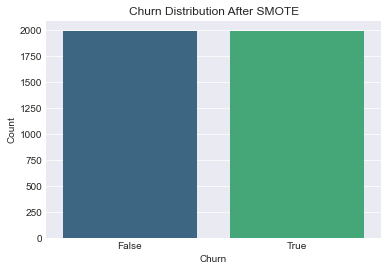

Overall Churn Rate After SMOTE is 50.0 %


In [50]:
# Convert y_train_resampled to a DataFrame to use value_counts
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['churn'])

# Calculate churn value counts for resampled data
churn_resampled = y_train_resampled_df['churn'].value_counts()

# Plot churn distribution for resampled data
sns.barplot(x=churn_resampled.index, y=churn_resampled.values, palette='viridis')
plt.title('Churn Distribution After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.style.use('seaborn-darkgrid')
plt.show()

# Calculate churn rate for resampled data
churn_rate_resampled = (y_train_resampled.mean() * 100)
print('Overall Churn Rate After SMOTE is', round(churn_rate_resampled, 2), '%')

The data is now balanced

Train and Evaluate the Logistic Regression Model

In [ ]:
# # Initialize and train the logistic regression model
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))